# Dragon Curve Fractal

## Introduction

The **Dragon Curve** (also known as the Heighway Dragon or Jurassic Park Dragon) is a self-similar fractal curve that was first investigated by NASA physicists John Heighway, Bruce Banks, and William Harter in the 1960s. It gained popular recognition through its appearance in Michael Crichton's novel *Jurassic Park*.

## Mathematical Foundation

### Iterative Construction

The Dragon Curve can be constructed through an iterative L-system or by paper folding. The key insight is that at each iteration, we replace each line segment with two segments at right angles.

### L-System Representation

The Dragon Curve can be described by an L-system with the following rules:

- **Axiom:** $F_X$
- **Production Rules:**
  - $X \rightarrow X + Y F +$
  - $Y \rightarrow - F X - Y$

Where:
- $F$ means "draw forward"
- $+$ means "turn right 90°"
- $-$ means "turn left 90°"
- $X$ and $Y$ are variables that don't correspond to drawing actions

### Recursive Turn Sequence

An elegant approach uses the **turn sequence**. At iteration $n$, the sequence of turns can be generated recursively:

$$S_n = S_{n-1} + R + \overline{S_{n-1}}$$

Where:
- $S_n$ is the turn sequence at iteration $n$
- $R$ represents a right turn
- $\overline{S_{n-1}}$ is the reverse of $S_{n-1}$ with all turns flipped (L↔R)

### Fractal Dimension

The Dragon Curve has a fractal (Hausdorff) dimension of:

$$D = 2$$

This is because the curve is space-filling in the limit, though it never crosses itself.

### Self-Similarity

The Dragon Curve exhibits remarkable self-similarity. Two copies of the curve at iteration $n$ can be combined to form iteration $n+1$. Specifically, if we denote the curve as $C_n$:

$$C_{n+1} = C_n \cup R_{90°}(C_n)$$

Where $R_{90°}$ represents a 90° rotation about the endpoint of the first curve.

## Implementation

We'll implement the Dragon Curve using the turn sequence method, which is both elegant and efficient.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap

In [2]:
def generate_dragon_turns(iterations):
    """
    Generate the turn sequence for the Dragon Curve.
    
    Uses the recursive rule: S_n = S_{n-1} + R + reverse(flip(S_{n-1}))
    
    Parameters:
    -----------
    iterations : int
        Number of iterations (the curve will have 2^iterations segments)
        
    Returns:
    --------
    list : Sequence of turns (1 for right, -1 for left)
    """
    if iterations == 0:
        return []
    
    turns = [1]  # Start with a single right turn
    
    for _ in range(iterations - 1):
        # Create the new sequence: S + R + reverse(flip(S))
        # Flip means multiply by -1, reverse means [::-1]
        flipped_reversed = [-t for t in turns[::-1]]
        turns = turns + [1] + flipped_reversed
    
    return turns

In [3]:
def dragon_curve_points(iterations):
    """
    Generate the coordinates of the Dragon Curve.
    
    Parameters:
    -----------
    iterations : int
        Number of iterations
        
    Returns:
    --------
    numpy.ndarray : Array of shape (n_points, 2) containing (x, y) coordinates
    """
    turns = generate_dragon_turns(iterations)
    
    # Number of points = number of segments + 1
    n_points = len(turns) + 2
    points = np.zeros((n_points, 2))
    
    # Direction vectors for 4 cardinal directions
    # 0: right, 1: up, 2: left, 3: down
    directions = np.array([[1, 0], [0, 1], [-1, 0], [0, -1]])
    
    current_dir = 0  # Start facing right
    points[0] = [0, 0]  # Start at origin
    points[1] = [1, 0]  # First segment goes right
    
    for i, turn in enumerate(turns):
        # Update direction (turn right: +1, turn left: -1)
        current_dir = (current_dir + turn) % 4
        # Move in current direction
        points[i + 2] = points[i + 1] + directions[current_dir]
    
    return points

## Visualization

Let's visualize the Dragon Curve at different iterations to see how it develops.

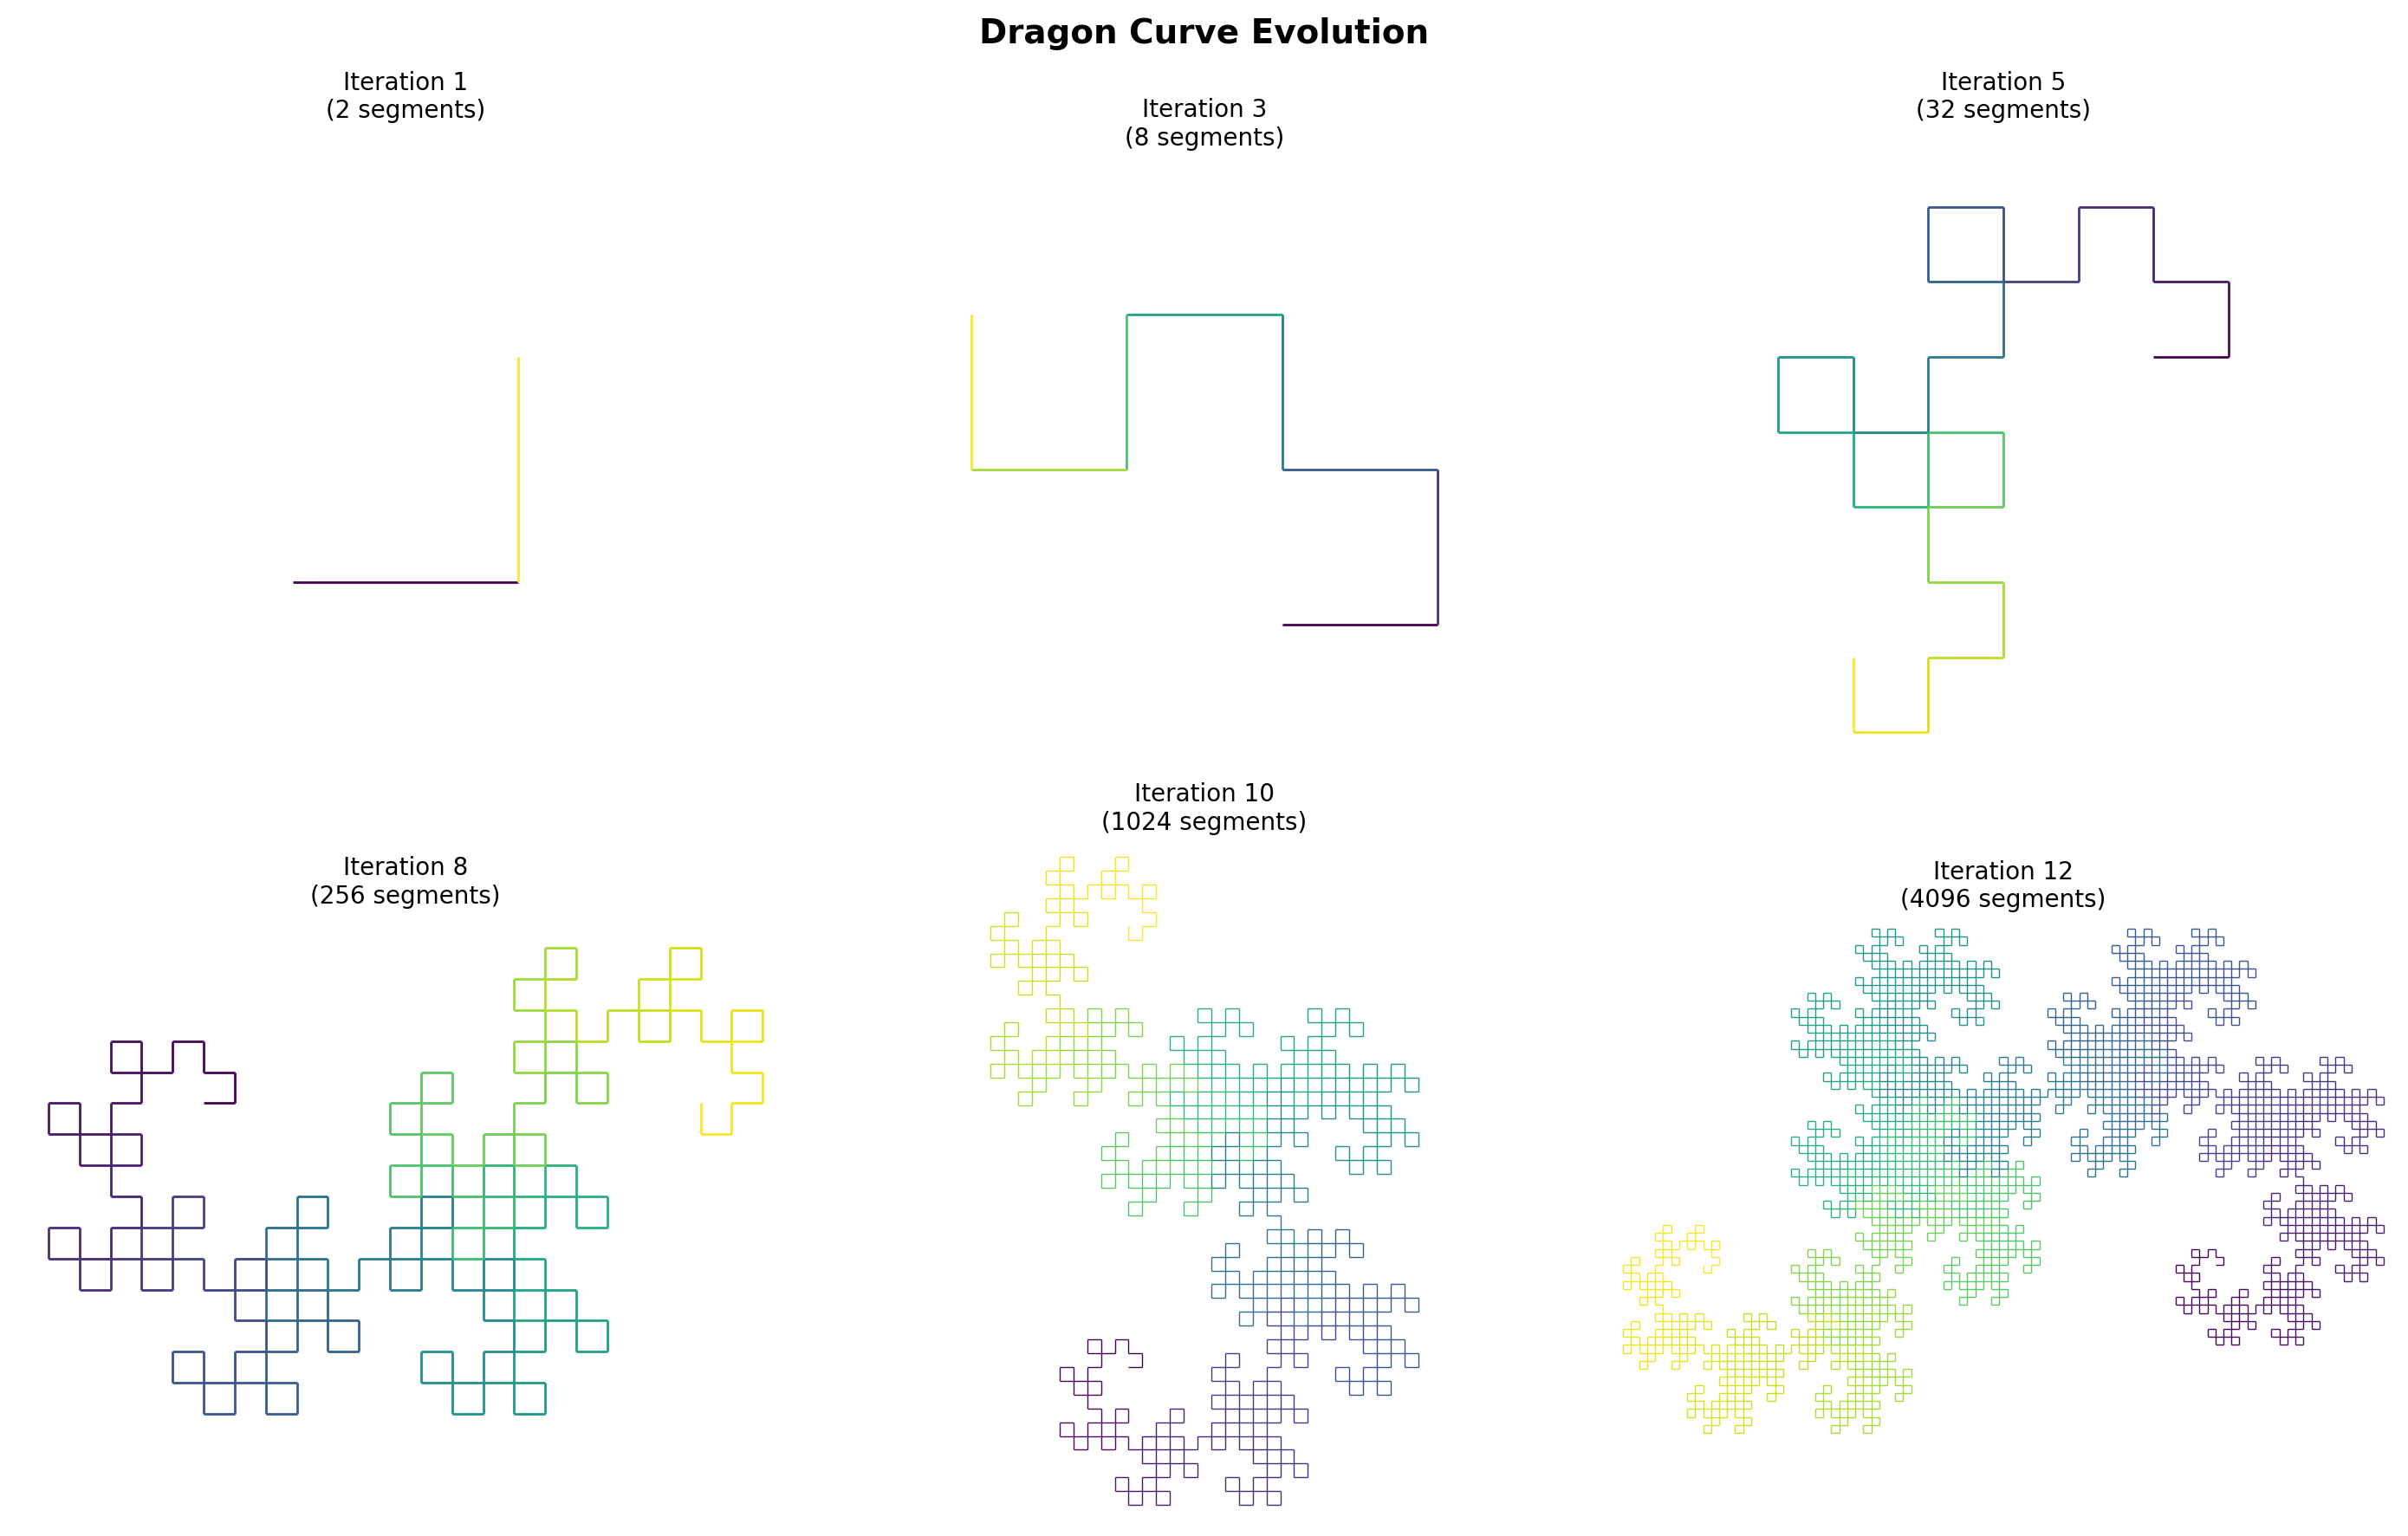

In [4]:
def plot_dragon_evolution():
    """
    Plot the Dragon Curve at different iterations to show its evolution.
    """
    fig, axes = plt.subplots(2, 3, figsize=(14, 9))
    iterations_to_show = [1, 3, 5, 8, 10, 12]
    
    for ax, n_iter in zip(axes.flatten(), iterations_to_show):
        points = dragon_curve_points(n_iter)
        
        # Create line segments for coloring
        segments = np.array([[points[i], points[i+1]] for i in range(len(points)-1)])
        
        # Color by position in sequence
        colors = plt.cm.viridis(np.linspace(0, 1, len(segments)))
        
        lc = LineCollection(segments, colors=colors, linewidth=0.5 if n_iter > 8 else 1)
        ax.add_collection(lc)
        
        ax.set_xlim(points[:, 0].min() - 1, points[:, 0].max() + 1)
        ax.set_ylim(points[:, 1].min() - 1, points[:, 1].max() + 1)
        ax.set_aspect('equal')
        ax.set_title(f'Iteration {n_iter}\n({2**n_iter} segments)', fontsize=10)
        ax.axis('off')
    
    plt.suptitle('Dragon Curve Evolution', fontsize=14, fontweight='bold')
    plt.tight_layout()
    return fig

fig_evolution = plot_dragon_evolution()
plt.show()

## High-Resolution Dragon Curve

Now let's create a detailed visualization of the Dragon Curve at a higher iteration count with gradient coloring.

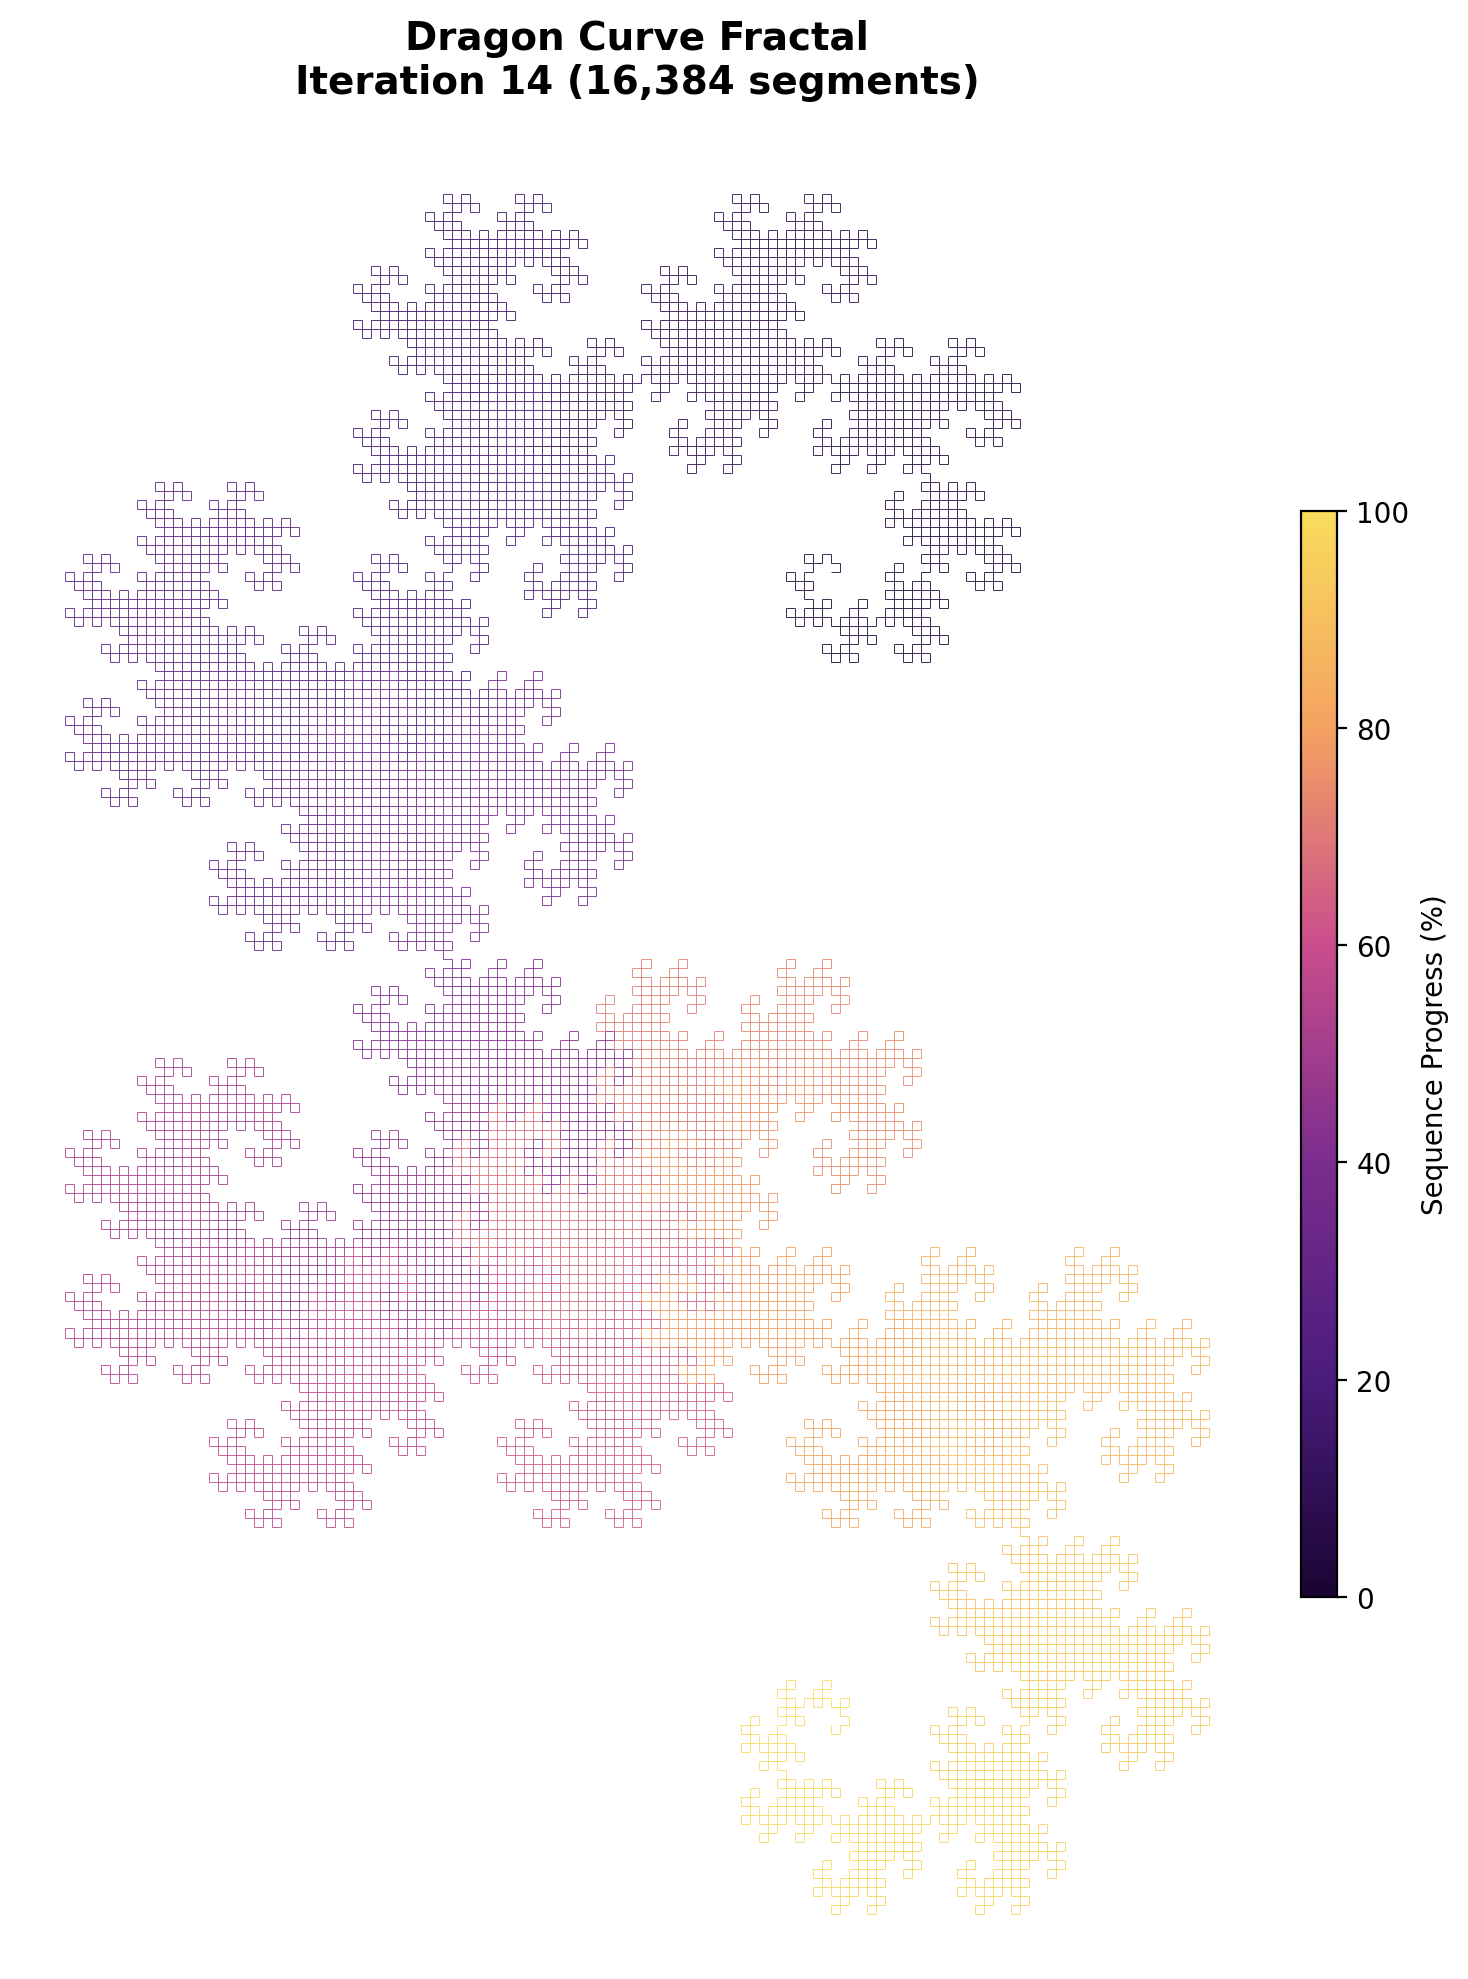

In [5]:
def plot_dragon_curve_detailed(iterations=14):
    """
    Create a detailed, publication-quality visualization of the Dragon Curve.
    
    Parameters:
    -----------
    iterations : int
        Number of iterations (default 14, giving 16384 segments)
    """
    # Generate the curve
    points = dragon_curve_points(iterations)
    n_segments = len(points) - 1
    
    # Create figure
    fig, ax = plt.subplots(figsize=(12, 10))
    
    # Create line segments
    segments = np.array([[points[i], points[i+1]] for i in range(n_segments)])
    
    # Create custom colormap
    colors_map = ['#1a0533', '#4a1c7c', '#7b2d8e', '#c94d8c', '#f4a261', '#f9dc5c']
    cmap = LinearSegmentedColormap.from_list('dragon', colors_map)
    
    # Color segments by their position in the sequence
    colors = cmap(np.linspace(0, 1, n_segments))
    
    # Create and add line collection
    lc = LineCollection(segments, colors=colors, linewidth=0.3)
    ax.add_collection(lc)
    
    # Set axis properties
    padding = 5
    ax.set_xlim(points[:, 0].min() - padding, points[:, 0].max() + padding)
    ax.set_ylim(points[:, 1].min() - padding, points[:, 1].max() + padding)
    ax.set_aspect('equal')
    ax.axis('off')
    
    # Add title and info
    ax.set_title(f'Dragon Curve Fractal\nIteration {iterations} ({n_segments:,} segments)', 
                 fontsize=14, fontweight='bold', pad=20)
    
    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=100))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, shrink=0.6, aspect=30, pad=0.02)
    cbar.set_label('Sequence Progress (%)', fontsize=10)
    
    plt.tight_layout()
    return fig

fig_detailed = plot_dragon_curve_detailed(iterations=14)
plt.show()

## Mathematical Properties Analysis

Let's analyze some interesting mathematical properties of the Dragon Curve.


Estimated fractal dimension from bounding area scaling: D ≈ 1.111
Theoretical value: D = 2 (space-filling)


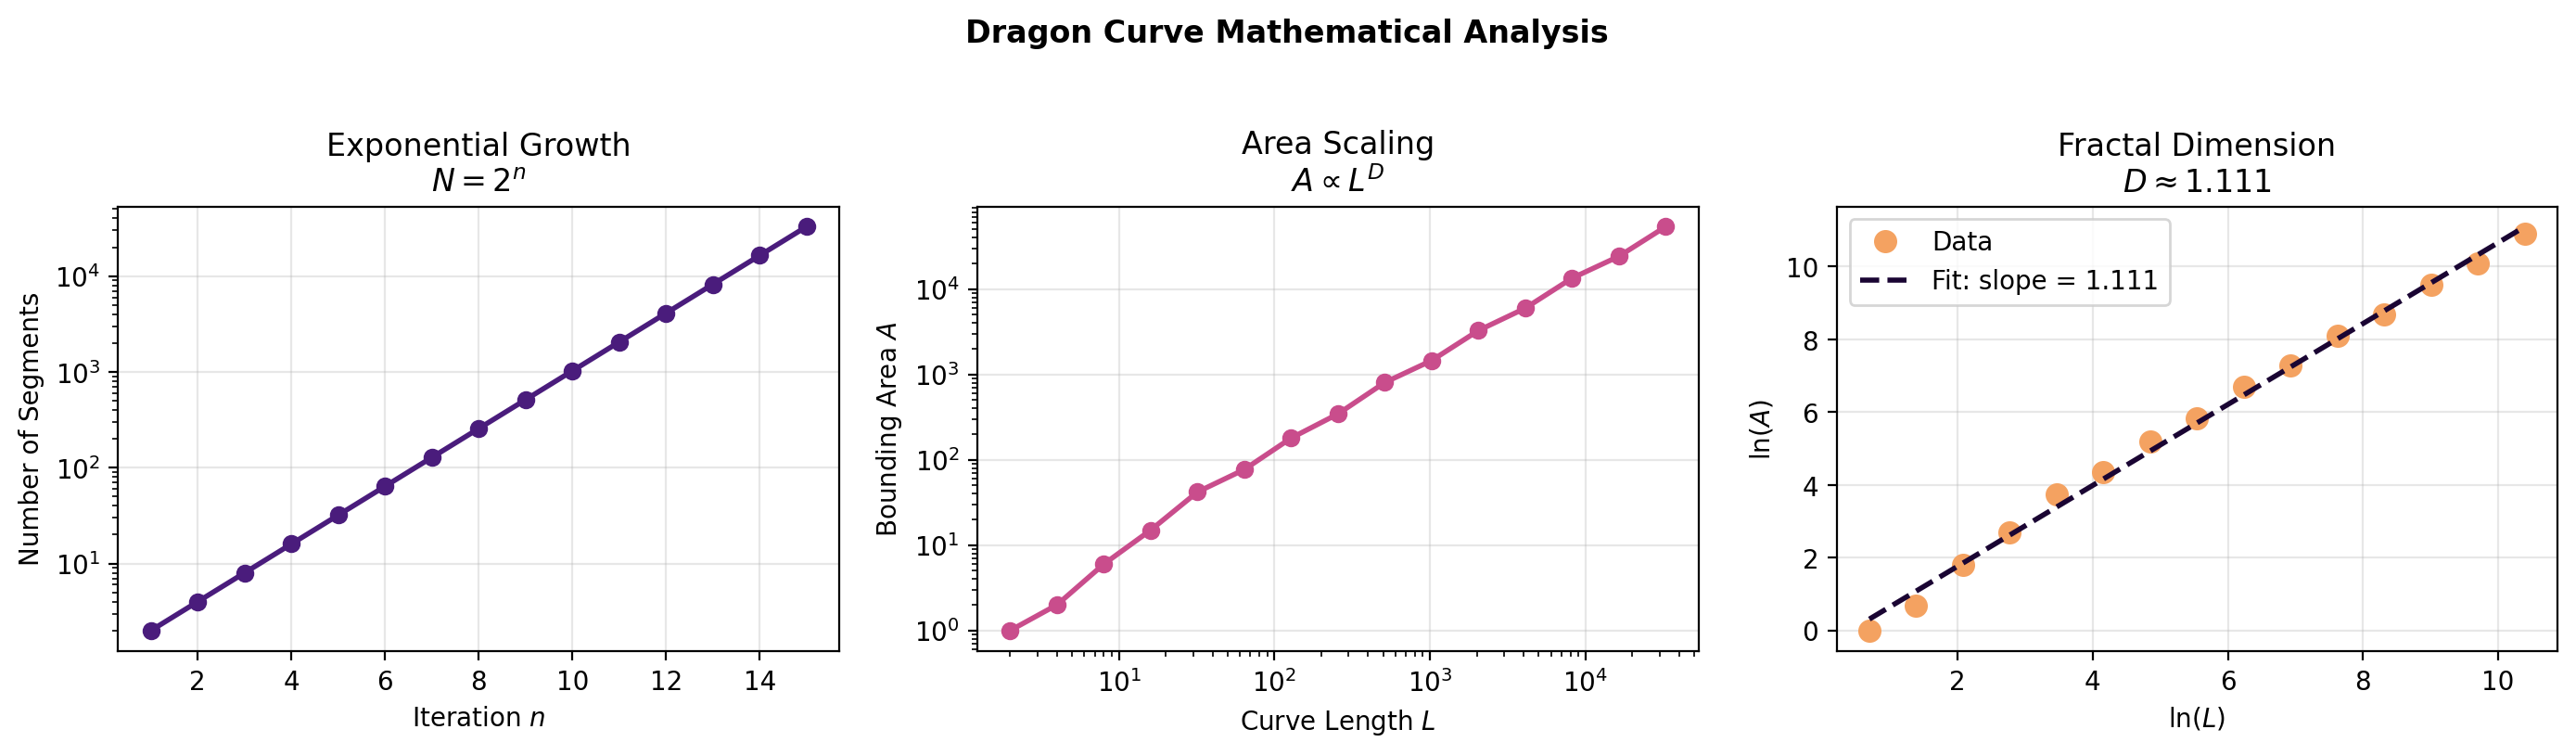

In [6]:
def analyze_dragon_properties(max_iterations=15):
    """
    Analyze mathematical properties of the Dragon Curve across iterations.
    """
    iterations = range(1, max_iterations + 1)
    n_segments = []
    bounding_areas = []
    curve_lengths = []
    
    for n in iterations:
        points = dragon_curve_points(n)
        
        # Number of segments
        n_seg = 2**n
        n_segments.append(n_seg)
        
        # Bounding box area
        width = points[:, 0].max() - points[:, 0].min()
        height = points[:, 1].max() - points[:, 1].min()
        bounding_areas.append(width * height)
        
        # Total curve length (each segment has length 1)
        curve_lengths.append(n_seg)
    
    # Create analysis plots
    fig, axes = plt.subplots(1, 3, figsize=(14, 4))
    
    # Plot 1: Number of segments (log scale)
    axes[0].semilogy(iterations, n_segments, 'o-', color='#4a1c7c', linewidth=2, markersize=6)
    axes[0].set_xlabel('Iteration $n$')
    axes[0].set_ylabel('Number of Segments')
    axes[0].set_title('Exponential Growth\n$N = 2^n$')
    axes[0].grid(True, alpha=0.3)
    
    # Plot 2: Bounding area vs curve length
    axes[1].loglog(curve_lengths, bounding_areas, 'o-', color='#c94d8c', linewidth=2, markersize=6)
    axes[1].set_xlabel('Curve Length $L$')
    axes[1].set_ylabel('Bounding Area $A$')
    axes[1].set_title('Area Scaling\n$A \\propto L^{D}$')
    axes[1].grid(True, alpha=0.3)
    
    # Fit to find scaling exponent
    log_L = np.log(curve_lengths)
    log_A = np.log(bounding_areas)
    coeffs = np.polyfit(log_L, log_A, 1)
    scaling_exp = coeffs[0]
    
    # Plot 3: Scaling analysis
    axes[2].plot(log_L, log_A, 'o', color='#f4a261', markersize=8, label='Data')
    fit_line = np.polyval(coeffs, log_L)
    axes[2].plot(log_L, fit_line, '--', color='#1a0533', linewidth=2, 
                 label=f'Fit: slope = {scaling_exp:.3f}')
    axes[2].set_xlabel('$\\ln(L)$')
    axes[2].set_ylabel('$\\ln(A)$')
    axes[2].set_title(f'Fractal Dimension\n$D \\approx {scaling_exp:.3f}$')
    axes[2].legend()
    axes[2].grid(True, alpha=0.3)
    
    plt.suptitle('Dragon Curve Mathematical Analysis', fontsize=12, fontweight='bold', y=1.02)
    plt.tight_layout()
    return fig, scaling_exp

fig_analysis, dimension = analyze_dragon_properties()
print(f"\nEstimated fractal dimension from bounding area scaling: D ≈ {dimension:.3f}")
print(f"Theoretical value: D = 2 (space-filling)")
plt.show()

## Tiling Properties

One remarkable property of the Dragon Curve is that four copies can tile the plane. Let's visualize this.

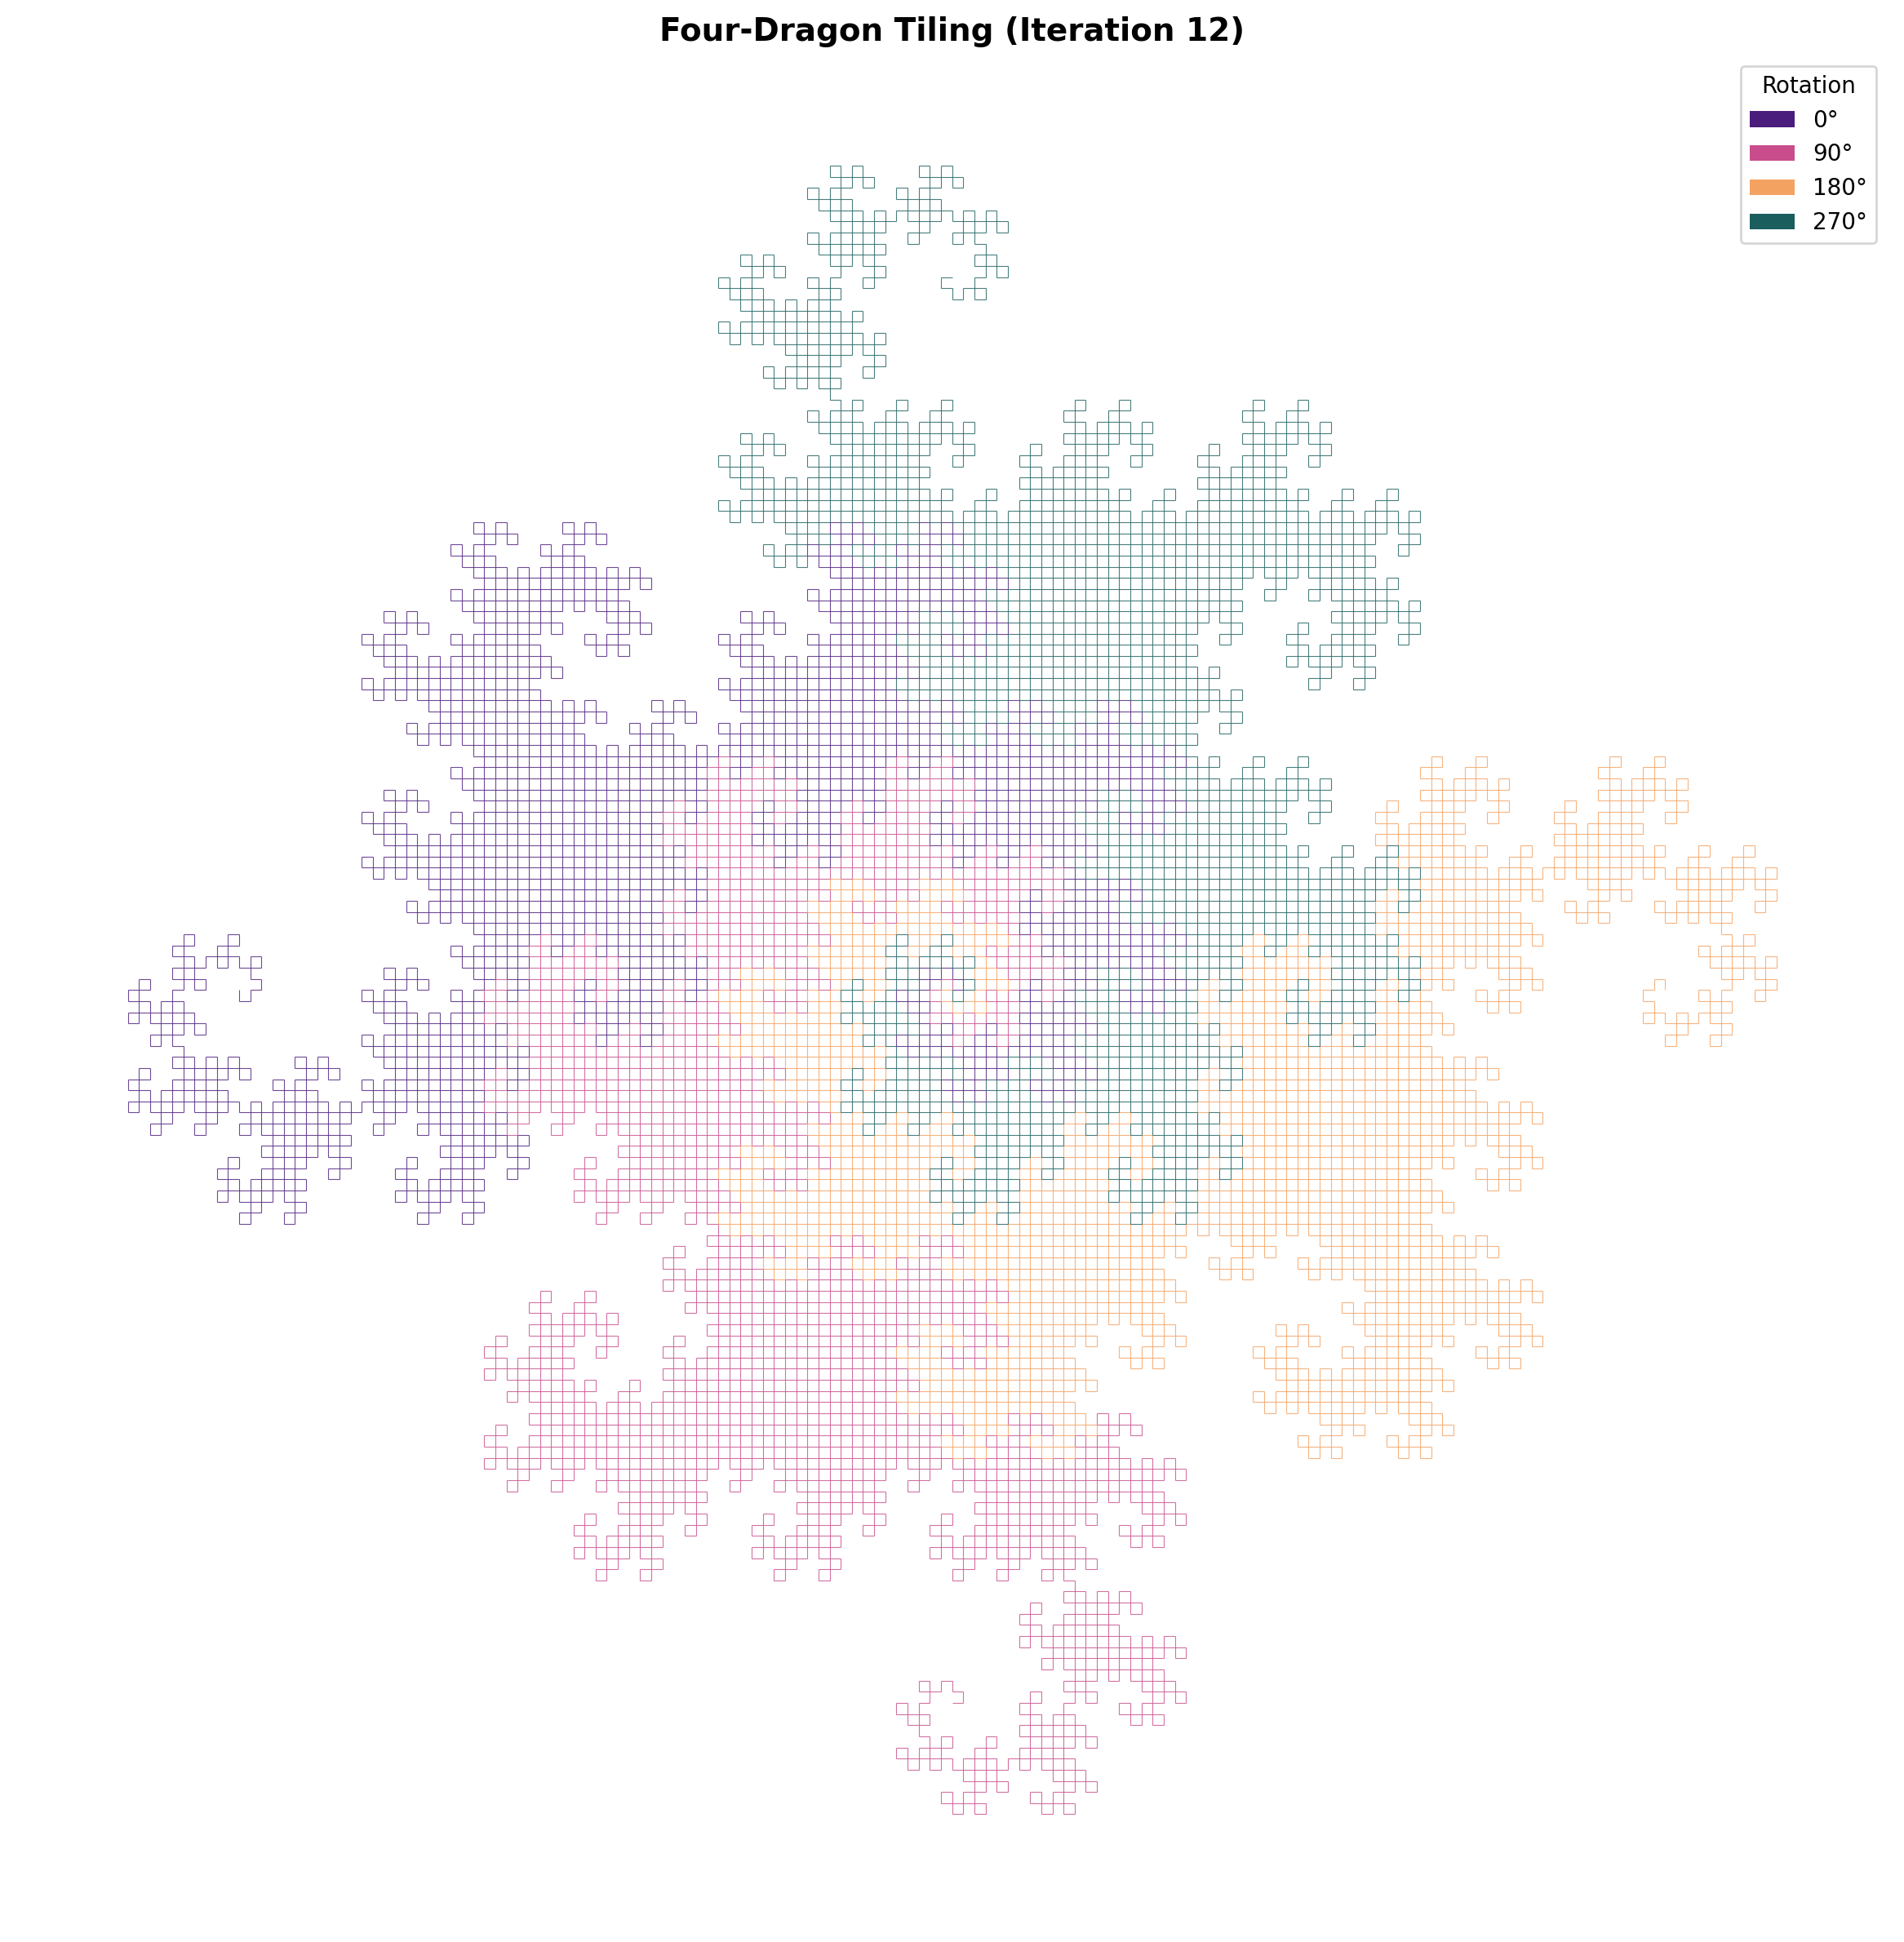

In [7]:
def plot_dragon_tiling(iterations=10):
    """
    Visualize how four Dragon Curves can tile together.
    """
    points = dragon_curve_points(iterations)
    
    fig, ax = plt.subplots(figsize=(12, 12))
    
    # Colors for each of the four dragons
    dragon_colors = ['#4a1c7c', '#c94d8c', '#f4a261', '#1a5e5e']
    
    # Original dragon
    for i, rotation in enumerate([0, 90, 180, 270]):
        # Rotation matrix
        theta = np.radians(rotation)
        R = np.array([[np.cos(theta), -np.sin(theta)],
                      [np.sin(theta), np.cos(theta)]])
        
        # Rotate points
        rotated = points @ R.T
        
        # Create segments
        segments = np.array([[rotated[j], rotated[j+1]] for j in range(len(rotated)-1)])
        
        # Plot
        lc = LineCollection(segments, colors=[dragon_colors[i]], linewidth=0.4, alpha=0.8)
        ax.add_collection(lc)
    
    # Set axis properties
    all_points = points
    padding = 10
    max_extent = max(abs(all_points).max(), abs(all_points).max())
    ax.set_xlim(-max_extent - padding, max_extent + padding)
    ax.set_ylim(-max_extent - padding, max_extent + padding)
    ax.set_aspect('equal')
    ax.axis('off')
    
    ax.set_title(f'Four-Dragon Tiling (Iteration {iterations})', 
                 fontsize=14, fontweight='bold')
    
    # Add legend
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor=c, label=f'{a}°') 
                       for c, a in zip(dragon_colors, [0, 90, 180, 270])]
    ax.legend(handles=legend_elements, loc='upper right', title='Rotation')
    
    plt.tight_layout()
    return fig

fig_tiling = plot_dragon_tiling(iterations=12)
plt.show()

## Final Visualization

Let's create the final publication-quality figure and save it.

Figure saved to plot.png


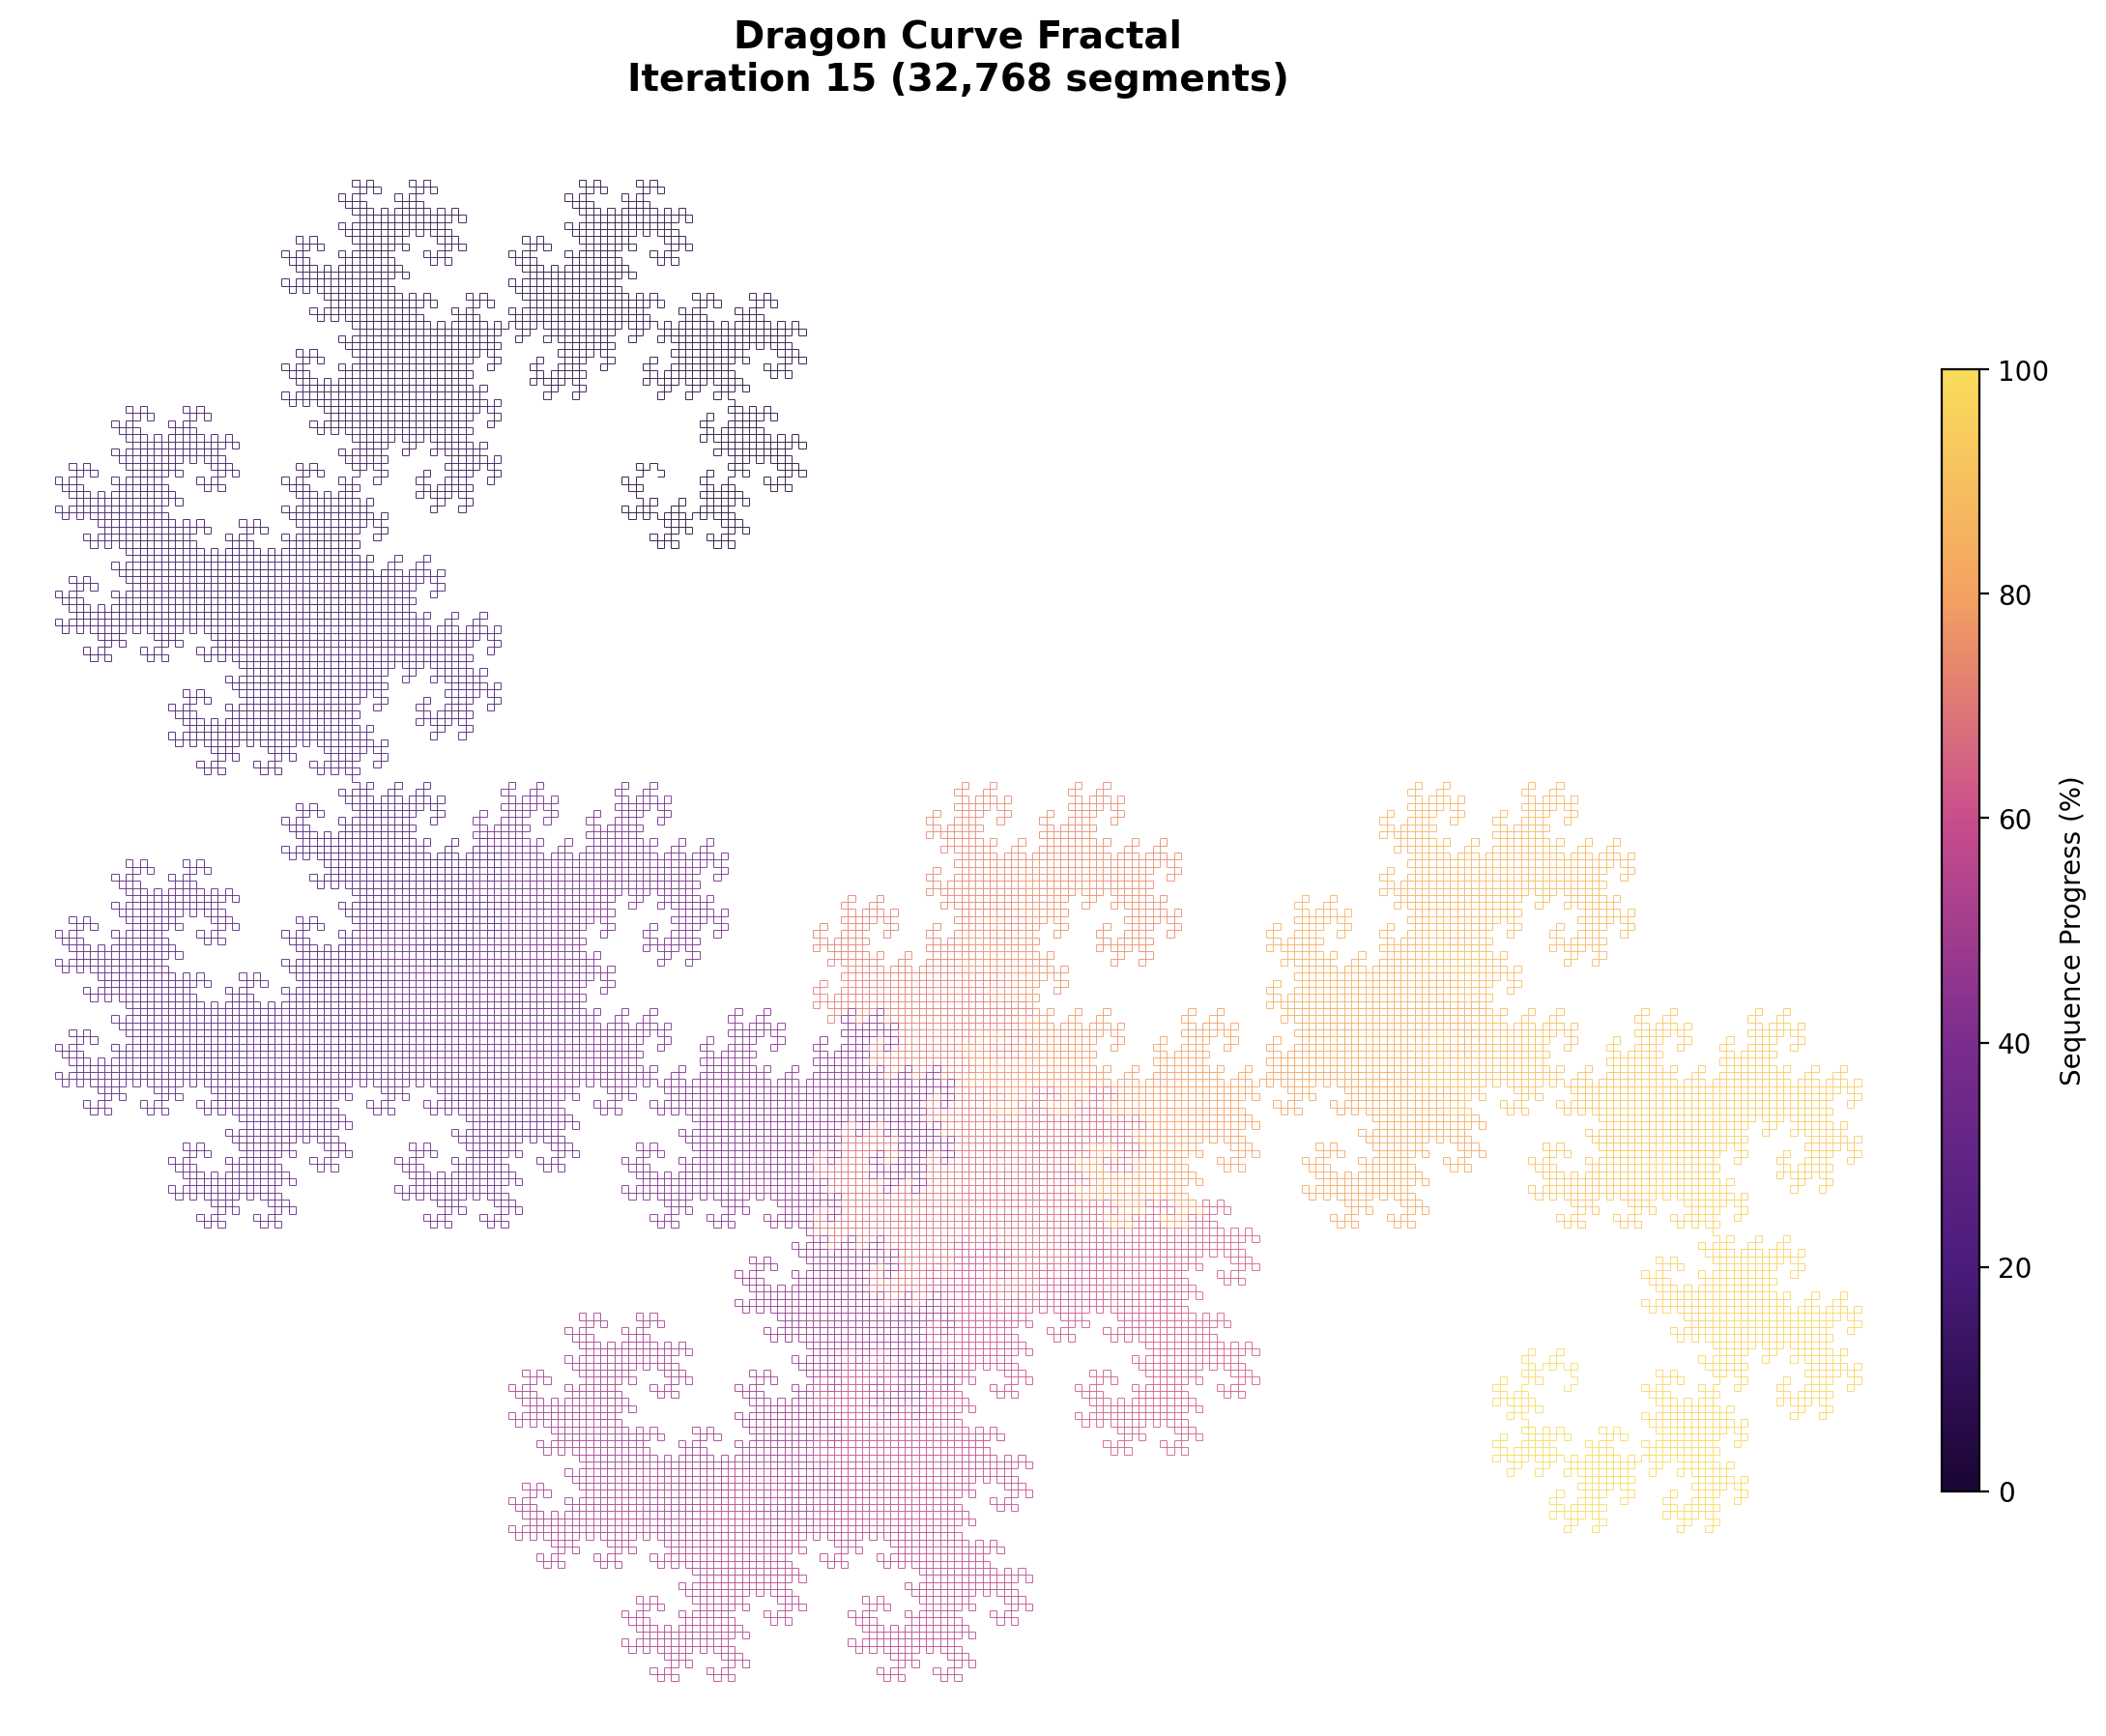

In [8]:
# Create final figure
fig_final = plot_dragon_curve_detailed(iterations=15)

# Save to plot.png
fig_final.savefig('dragon_curve_fractal_analysis.png', facecolor='white', edgecolor='none')
print("Figure saved to plot.png")
plt.show()

## Conclusion

The Dragon Curve is a fascinating example of a space-filling curve with fractal dimension $D = 2$. Key properties include:

1. **Self-similarity**: Each iteration contains two copies of the previous iteration
2. **Non-self-intersection**: Despite being space-filling, the curve never crosses itself
3. **Tiling**: Four copies can tile the plane perfectly
4. **Simple generation**: Can be generated by a simple L-system or turn sequence

The curve demonstrates how complex, intricate patterns can emerge from simple recursive rules—a hallmark of fractal geometry.